## Проект: Исследовательский анализ данных

### Описание проекта

Для проекта используются данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Цель проекта** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**План работы:**
* открытие файла и изучение общей информации;
* предобработка данных: работа с пропусками, типами данных, дубликатами, аномальными и редкими значениями;
* добавление в таблицу новых столбцов;
* проведение исследовательского анализа данных: изучение параметров объекта и взаимосвязей, факторов, которые влияют на показатели
* формирование выводов по обнаруженным закономерностям.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

#### Шаг 1. Открытие файла с данными и изучение общей информации

In [3]:
try:
    data = pd.read_csv('C:/real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [4]:
#вывожу первые 10 строчек датафрейма data на экран

pd.set_option('display.max_columns', 50) 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


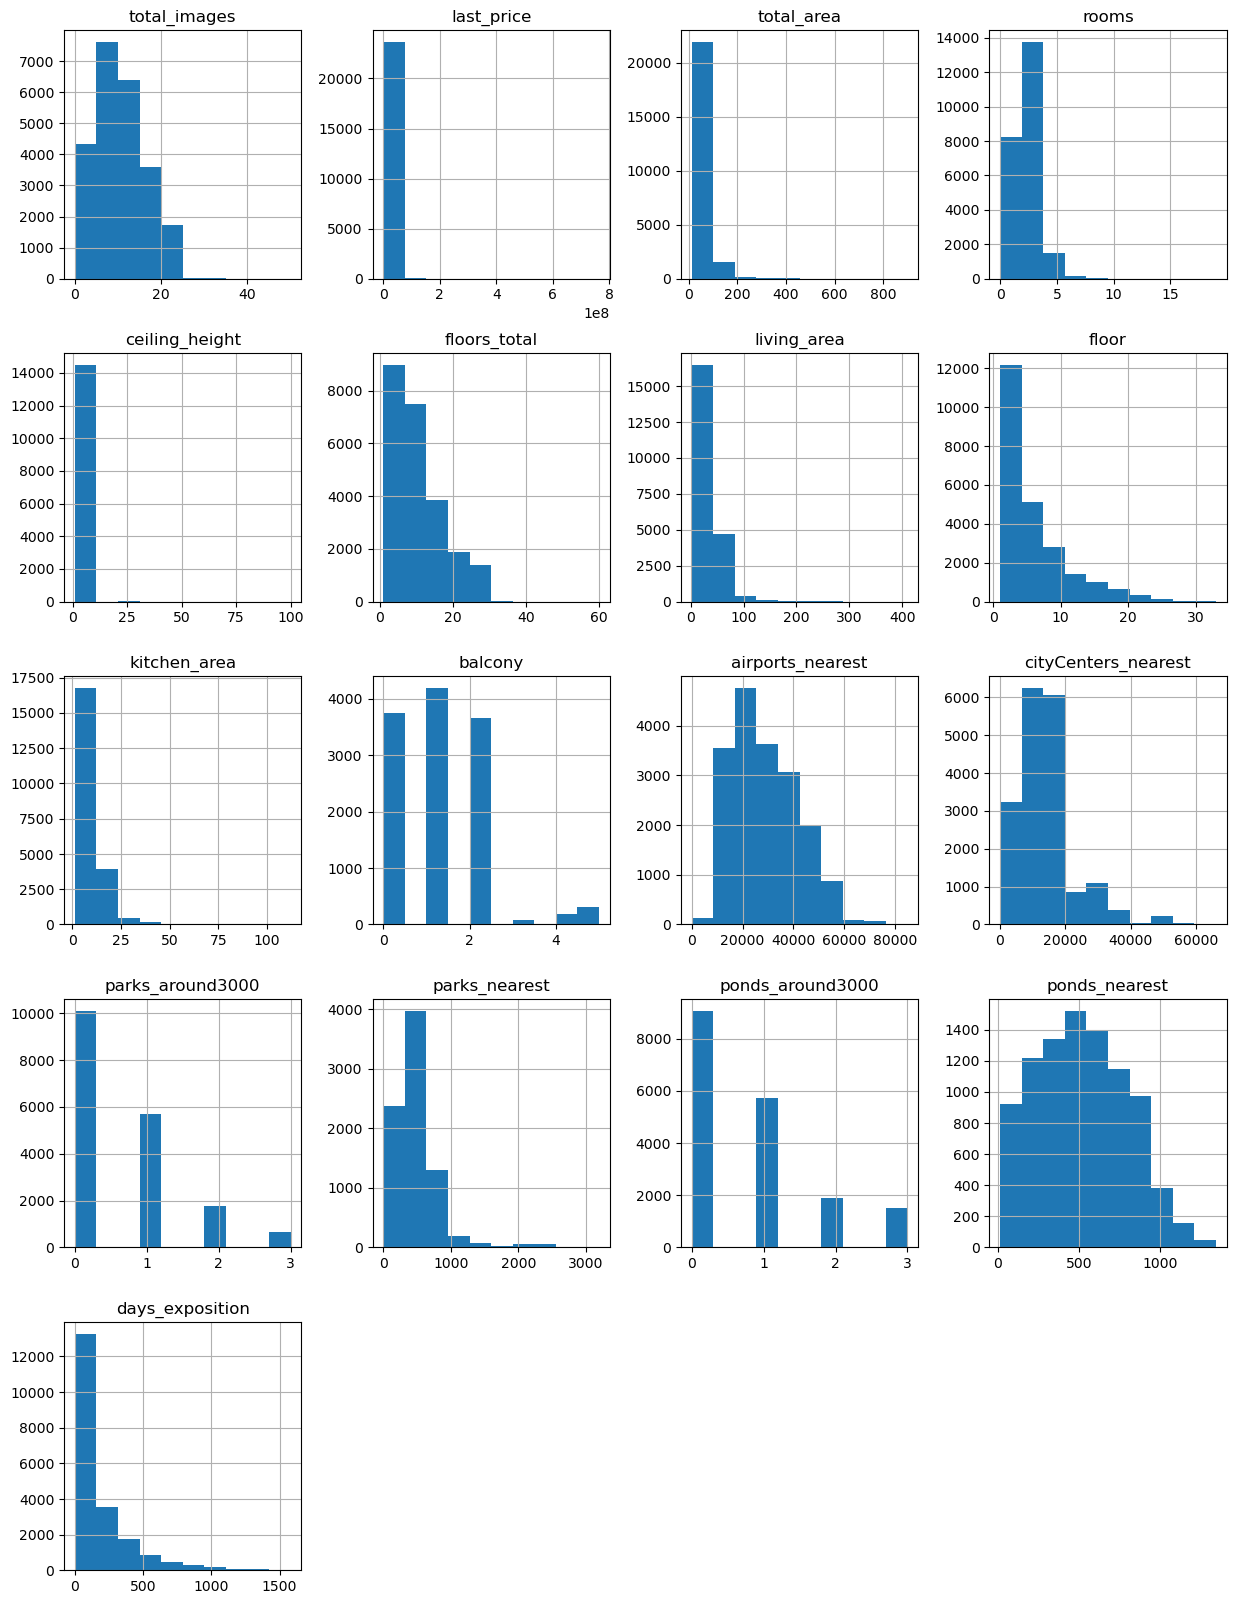

In [5]:
#строю гистограммы для столбцов датафрейма

data.hist(figsize=(15, 20))
None

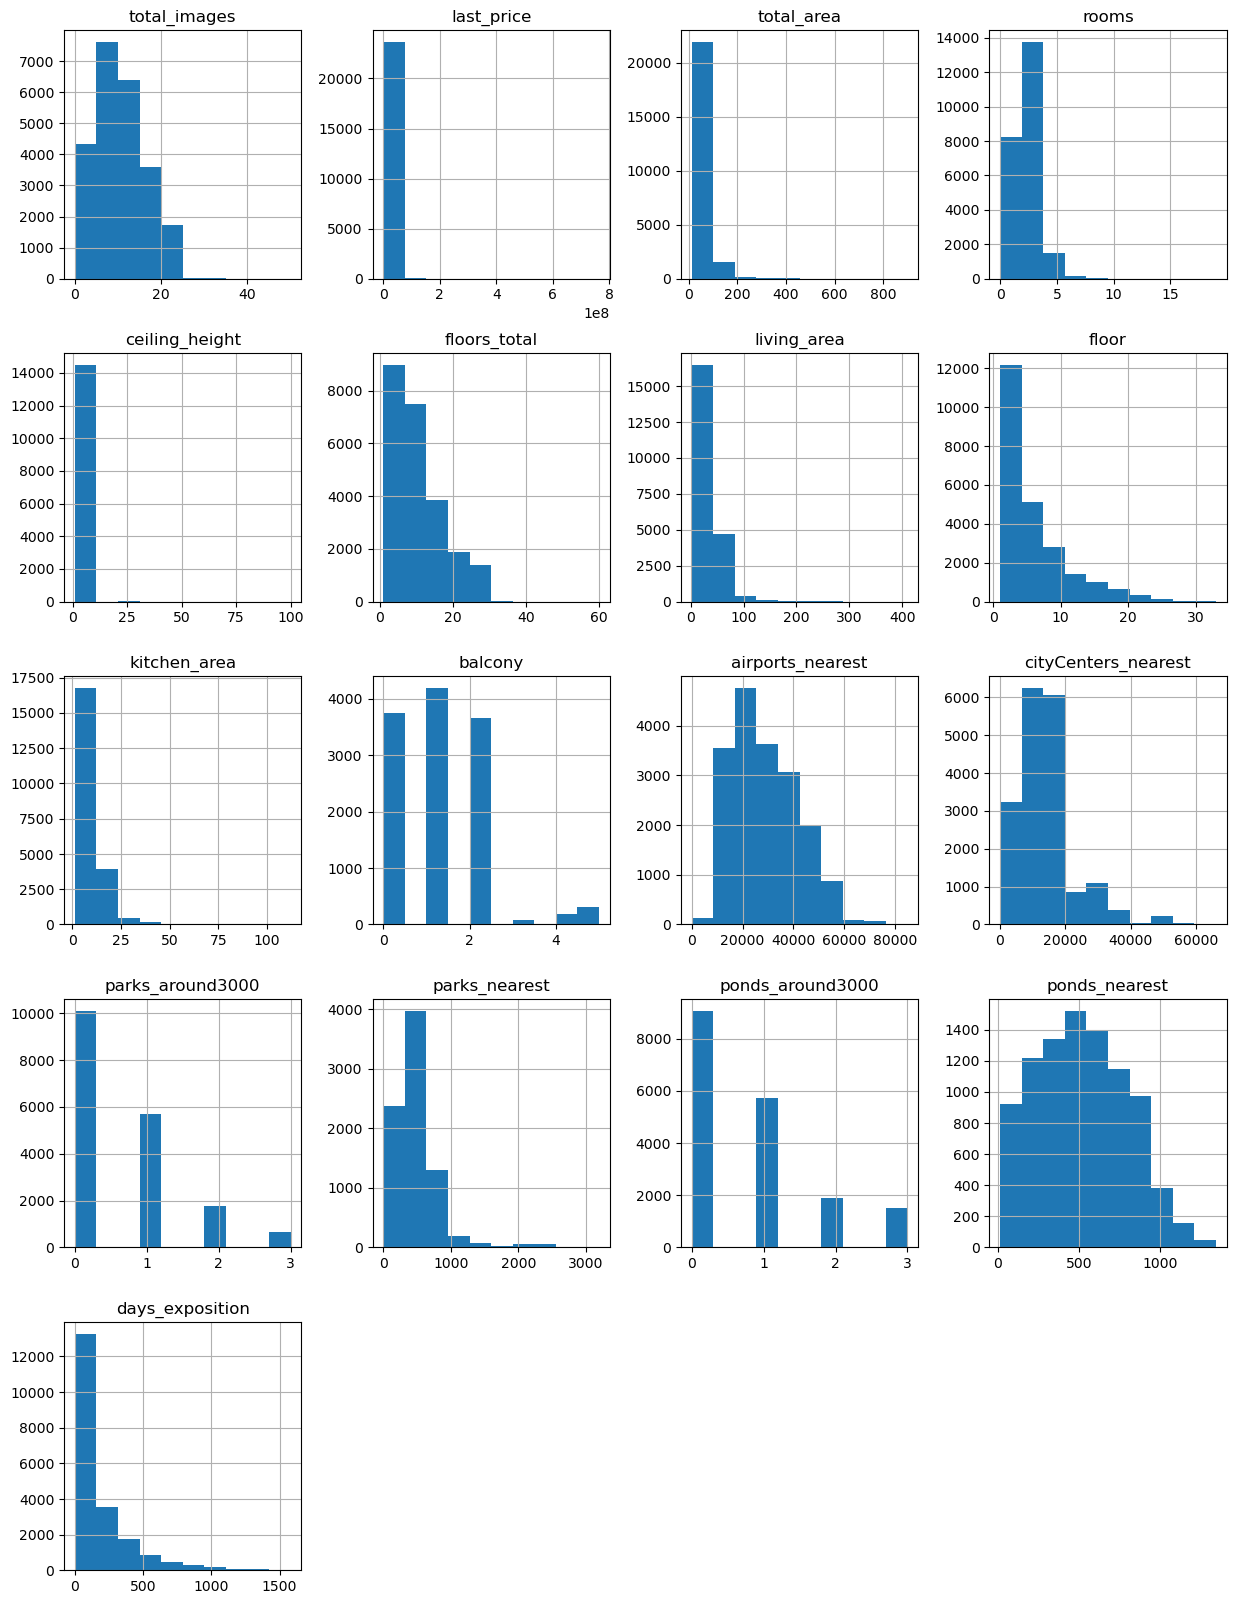

In [6]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

**Далее нужно более детально изучить показатели: узнать типы данных, проверить наличие пропусков, аномалий. Для этого необходимо провести предобработку данных.**   

#### Шаг 2. Предобработка данных

In [7]:
#вывожу основную информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**В датафрейме тип данных всех столбцов корректный, кроме first_day_exposition, его нужно преобразовать.**

In [8]:
#изменяю тип из строкового в datetime64

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
#проверяю изменения значений с object на datetime64

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [10]:
#проверяю как теперь выглядит датафрейм

pd.set_option('display.max_columns', 50) 
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [11]:
#проверяю число пропусков в данных

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
#считаю процент пропусков в данных

data.isna().sum() / len(data)* 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

**Пропуск в ceiling_height, floors_total и kitchen_area может быть связан с тем, что продавец недвижимости не знает этой информации, или не считает эти данные важными, или просто не внёс её в объявление. is_apartment не указывают,т.к. не знают что это значит. Пропуск в locality_name странный, но т.к. там всего 49 значений(менее 1% от общих данных), эти строки можно удалить. Также удалю строки с пропуском в floors_total, их менее 1%. Нет информации в картографических данных из-за того, что недвижимость находится далеко от центра/аэропорта/парка. days_exposition со значением NAN связано с тем, что объявление еще не сняли с публикации. Пропуски в столбце balcony скорее всего означают, что балкона нет, поэтому их можно заменить на значение 0.**

In [13]:
#меняю пропуски в столбце с наличием балкона на 0

data['balcony'] = data['balcony'].fillna(0)

In [14]:
#удаляю строки с пропуском в общем кол-ве этажей

data = data.dropna(subset=['floors_total'])

In [15]:
#удаляю строки с пропуском в названии населенного пункта

data = data.dropna(subset=['locality_name'])

**Cтолбец с пропущенными значениями — `living_area` — хранит данные о жилой площади. Жилая площадь зависит от количества общей площади,
поэтому заполнить пропуски в этом столбце можно медианным значением по каждому типу из столбца `total_area`.** 

In [16]:
#перебираю в цикле строки, в которых есть пропуск в living_area и меняю их на медианное значение в зависимости от общей площади


for t in data['total_area'].unique():
    data.loc[(data['total_area'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == t), 'living_area'].median()

In [17]:
#заменяю пропуски в площади кухни на их медианное значение

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [18]:
#проверяю замены пропусков

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area               133
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [19]:
#считаю процент пропусков в данных

data.isna().sum() / len(data)* 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.548695
floors_total             0.000000
living_area              0.564396
floor                    0.000000
is_apartment            88.287715
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.441545
cityCenters_nearest     23.343942
parks_around3000        23.339699
parks_nearest           65.924040
ponds_around3000        23.339699
ponds_nearest           61.654997
days_exposition         13.456397
dtype: float64

**Пропуски в картографических данных занимают от 20 до 60 %, поэтому терять их нельзя, заменю их на медианное значение. Тоже самое попробую сделать для количество дней продажи и ceiling_height(высоты потолка).Пропуск is_apartment скорее всего нам не пригодится, поэтому оставлю здесь пропуски без изменений.**

In [20]:
#пропуски в расстоянии до центра города меняю на медианное значение

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

In [21]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

In [22]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

In [23]:
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())

In [24]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())

In [25]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

In [26]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

In [27]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

### Поиск уникальных значений

In [28]:
#проверяю уникальные значения в названии населенного пункта

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [29]:
#меняю в столбце locality_name букву ё на е

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [30]:
#проверяю изменение

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

**Один и тот же населенный пункт упоминают как "поселок" и "поселок городского типа", поэтому заменю все фразы "поселок","поселок городского типа" и пр. на пробел.**

In [31]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', '')

In [32]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', '')

In [33]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', '')

In [34]:
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', '')

In [35]:
data['locality_name'] = data['locality_name'].str.replace('поселок', '')

In [36]:
data['locality_name'] = data['locality_name'].str.replace('деревня', '')

In [37]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')

In [38]:
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', '')

In [39]:
data['locality_name'] = data['locality_name'].str.replace('село', '')

In [40]:
#проверяю результат замены

data['locality_name'].unique()

array(['Санкт-Петербург', ' Шушары', ' Янино-1', ' Парголово', ' Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', ' Кудрово',
       'Коммунар', 'Колпино', ' Красный Бор', 'Гатчина', ' Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', ' Новое Девяткино',
       ' Металлострой', ' Лебяжье', ' Сиверский', ' Молодцово',
       ' Кузьмоловский', ' Новая Ропша', 'Павловск', ' Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       ' Куттузи', ' Аннино', ' Ефимовский', ' Плодовое', ' Заклинье',
       ' Торковичи', ' Первомайское', 'Красное Село', ' Понтонный',
       'Сясьстрой', ' Старая', ' Лесколово', ' Новый Свет', 'Сланцы',
       ' Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', ' Оржицы', ' Кальтино', 'Кудрово',
       ' Романовка', ' Бугры', ' Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', ' Павлово', ' Оредеж', ' Копорье', ' Молодежное',
       'Тихвин', ' Победа',

#### Изучение редких и выбивающихся значений

In [41]:
#вывожу уникальные значения цены в порядке убывания

data.sort_values(by='last_price', ascending=False)['last_price'].unique()

array([7.630e+08, 4.200e+08, 4.013e+08, ..., 4.400e+05, 4.300e+05,
       1.219e+04])

**Вряд ли жилье стоит дешевле 1млн., но отбросим, например, значения меньше 600 000руб.**

In [42]:
#считаю сколько строк с ценой менее 600000руб.

len(data.query('last_price < 600000')) 

33

**Всего 16 значений, можно удалить.**

In [43]:
#удаляю значения общей площади менее 18 кв.метров.

data = data[data['last_price'] > 600000]

In [44]:
#вывожу уникальные значения общей площади в порядке убывания

data.sort_values(by='total_area', ascending=False)['total_area'].unique()

array([900. , 631.2, 631. , ...,  13.2,  13. ,  12. ])

**Общая площадь жилья менее 18 кв.м. - очень мало, если таких значений немного, то удалю их.**

In [45]:
#считаю сколько строк с общей площадью менее 18 кв.м.

len(data.query('total_area < 18')) 

15

**Всего 15 значений, можно удалить.**

In [46]:
#удаляю значения общей площади менее 18 кв.метров.

data = data[data['total_area'] > 18]

In [47]:
#вывожу уникальные значения жилой площади в порядке убывания

data.sort_values(by='living_area', ascending=False)['living_area'].unique()

array([409.7, 409. , 347.5, ...,   3. ,   2. ,   nan])

**Жилая площадь менее 10 кв.м. тоже очень мало, проверю сколько таких.**

In [48]:
len(data.query('living_area < 10')) 

24

In [49]:
#удаляю значения жилой площади менее 18 кв.метров.

data = data[data['living_area'] > 18]

In [50]:
#вывожу уникальные значения комнат в порядке убывания

data.sort_values(by='rooms', ascending=False)['rooms'].unique()

array([19, 16, 15, 14, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int64)

In [51]:
#вывожу уникальные значения этажа в порядке убывания

data.sort_values(by='floor', ascending=False)['floor'].unique()

array([33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [52]:
#вывожу уникальные значения площади кухни в порядке убывания

data.sort_values(by='kitchen_area', ascending=False)['kitchen_area'].unique()

array([112.  , 107.  , 100.7 , 100.  ,  93.2 ,  93.  ,  87.2 ,  77.  ,
        75.  ,  72.  ,  70.  ,  66.  ,  65.  ,  64.  ,  63.4 ,  63.  ,
        62.5 ,  62.  ,  60.  ,  58.4 ,  58.  ,  56.2 ,  56.  ,  55.7 ,
        55.5 ,  54.3 ,  54.2 ,  54.  ,  53.1 ,  53.  ,  51.8 ,  51.  ,
        50.2 ,  50.  ,  49.4 ,  49.2 ,  48.5 ,  48.3 ,  48.  ,  47.  ,
        46.8 ,  46.  ,  45.5 ,  45.  ,  44.9 ,  44.7 ,  44.  ,  43.8 ,
        43.4 ,  43.2 ,  43.  ,  42.8 ,  42.7 ,  42.6 ,  42.5 ,  42.4 ,
        42.  ,  41.9 ,  41.3 ,  41.1 ,  41.  ,  40.7 ,  40.4 ,  40.2 ,
        40.1 ,  40.  ,  39.9 ,  39.7 ,  39.1 ,  39.  ,  38.86,  38.1 ,
        38.  ,  37.9 ,  37.8 ,  37.78,  37.7 ,  37.6 ,  37.5 ,  37.  ,
        36.6 ,  36.5 ,  36.4 ,  36.3 ,  36.2 ,  36.  ,  35.9 ,  35.7 ,
        35.6 ,  35.5 ,  35.4 ,  35.35,  35.1 ,  35.  ,  34.8 ,  34.78,
        34.7 ,  34.6 ,  34.4 ,  34.3 ,  34.19,  34.1 ,  34.  ,  33.9 ,
        33.8 ,  33.6 ,  33.1 ,  33.  ,  32.9 ,  32.8 ,  32.7 ,  32.55,
      

In [53]:
len(data.query('kitchen_area < 5')) 

70

In [54]:
#удаляю значения площади кухни менее 5 кв. метров.

data = data[data['kitchen_area'] > 5]

In [55]:
#вывожу данные из столбца с высотой потолка,сортировка в порядке убывания

data.sort_values(by='ceiling_height', ascending=False)['ceiling_height'].unique()

array([32.  , 27.5 , 27.  , 26.  , 25.  , 24.  , 22.6 , 20.  , 14.  ,
        8.3 ,  8.  ,  6.  ,  5.8 ,  5.5 ,  5.3 ,  5.2 ,  4.9 ,  4.8 ,
        4.7 ,  4.65,  4.5 ,  4.45,  4.4 ,  4.37,  4.3 ,  4.25,  4.2 ,
        4.19,  4.15,  4.14,  4.1 ,  4.06,  4.  ,  3.98,  3.95,  3.93,
        3.9 ,  3.88,  3.87,  3.86,  3.85,  3.84,  3.83,  3.82,  3.8 ,
        3.78,  3.76,  3.75,  3.7 ,  3.69,  3.68,  3.67,  3.66,  3.65,
        3.63,  3.62,  3.6 ,  3.59,  3.58,  3.57,  3.56,  3.55,  3.54,
        3.53,  3.52,  3.51,  3.5 ,  3.49,  3.48,  3.47,  3.46,  3.45,
        3.44,  3.43,  3.42,  3.4 ,  3.39,  3.38,  3.37,  3.36,  3.35,
        3.34,  3.33,  3.32,  3.31,  3.3 ,  3.29,  3.28,  3.27,  3.26,
        3.25,  3.24,  3.23,  3.22,  3.21,  3.2 ,  3.18,  3.17,  3.16,
        3.15,  3.14,  3.13,  3.12,  3.11,  3.1 ,  3.09,  3.08,  3.07,
        3.06,  3.05,  3.04,  3.03,  3.02,  3.01,  3.  ,  2.98,  2.97,
        2.96,  2.95,  2.94,  2.93,  2.92,  2.91,  2.9 ,  2.89,  2.88,
        2.87,  2.86,

**Значения типа 32м - скорее всего ошибка, попробую их заменить на 3,2м.**

In [56]:
#в столбце, где высота потолка > 24, меняю значения на деленные на 10

data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 24, data['ceiling_height'] / 10)

In [57]:
#проверяю результат в порядке убывания

data.sort_values(by='ceiling_height', ascending=False)['ceiling_height'].unique()

array([22.6 , 20.  , 14.  ,  8.3 ,  8.  ,  6.  ,  5.8 ,  5.5 ,  5.3 ,
        5.2 ,  4.9 ,  4.8 ,  4.7 ,  4.65,  4.5 ,  4.45,  4.4 ,  4.37,
        4.3 ,  4.25,  4.2 ,  4.19,  4.15,  4.14,  4.1 ,  4.06,  4.  ,
        3.98,  3.95,  3.93,  3.9 ,  3.88,  3.87,  3.86,  3.85,  3.84,
        3.83,  3.82,  3.8 ,  3.78,  3.76,  3.75,  3.7 ,  3.69,  3.68,
        3.67,  3.66,  3.65,  3.63,  3.62,  3.6 ,  3.59,  3.58,  3.57,
        3.56,  3.55,  3.54,  3.53,  3.52,  3.51,  3.5 ,  3.49,  3.48,
        3.47,  3.46,  3.45,  3.44,  3.43,  3.42,  3.4 ,  3.39,  3.38,
        3.37,  3.36,  3.35,  3.34,  3.33,  3.32,  3.31,  3.3 ,  3.29,
        3.28,  3.27,  3.26,  3.25,  3.24,  3.23,  3.22,  3.21,  3.2 ,
        3.18,  3.17,  3.16,  3.15,  3.14,  3.13,  3.12,  3.11,  3.1 ,
        3.09,  3.08,  3.07,  3.06,  3.05,  3.04,  3.03,  3.02,  3.01,
        3.  ,  2.98,  2.97,  2.96,  2.95,  2.94,  2.93,  2.92,  2.91,
        2.9 ,  2.89,  2.88,  2.87,  2.86,  2.85,  2.84,  2.83,  2.82,
        2.81,  2.8 ,

**Обычно высота потолка не менее 2.4 метра, 6 метров и выше - это уже странные значения, удаляю их.**

In [58]:
#считаю количество значений высоты потолка больше 6 и меньше 2,4м

len(data.query('ceiling_height > 6 | ceiling_height < 2.4'))

18

In [59]:
#удаляю значения больше 6 метров и менее 2,4м.

data = data[(data['ceiling_height'] < 6) & (data['ceiling_height'] >= 2.4)]

In [60]:
#проверю исправление всех пропусков еще раз

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            15527
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition             0
dtype: int64

#### Шаг 3. Добавление в таблицу новых столбцов

In [61]:
#добавляю столбец с ценой одного квадратного метра

data['unit_price'] = data['last_price'] / data['total_area']

In [62]:
#добавляю столбец с днем недели публикации объявления

data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).day_of_week

In [63]:
#добавляю столбец с месяцем публикации объявления

data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [64]:
#добавляю столбец с годом публикации объявления

data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [65]:
#проверяю результат добавления новых столбцов

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,unit_price,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,95.0,9,NaN,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [66]:
#строю функцию, которая вернет значение "первый", если этаж первый, "последний" - если последний и "другой" в остальных случаях

def categorize_floors(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] < data['floors_total']:
        return 'другой'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'не найдено'

In [67]:
#добавляю результат функции в новый столбец 'floor_category'

data['floor_category'] = data.apply(categorize_floors,axis=1)

In [68]:
#добавляю столбец с расстоянием до центра города в километрах (перевожу из м в км и округляю до целых значений)

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round().astype('Int64')

In [69]:
#проверяю результат 

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,unit_price,week_day,month,year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,95.0,9,NaN,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,44.3,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,455.0,0.0,503.0,95.0,110544.692737,3,4,2019,другой,12
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,455.0,0.0,503.0,289.0,88524.590164,6,2,2017,другой,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,NaN,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,14
11,9,3300000.0,44.0,2018-08-27,2,2.65,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,455.0,0.0,503.0,7.0,75000.000000,0,8,2018,другой,52
12,10,3890000.0,54.0,2016-06-30,2,2.65,5.0,30.0,5,NaN,False,False,9.0,0.0,Сертолово,26757.0,13096.5,0.0,455.0,1.0,503.0,90.0,72037.037037,3,6,2016,последний,13


#### Шаг 4. Проведение исследовательского анализа данных

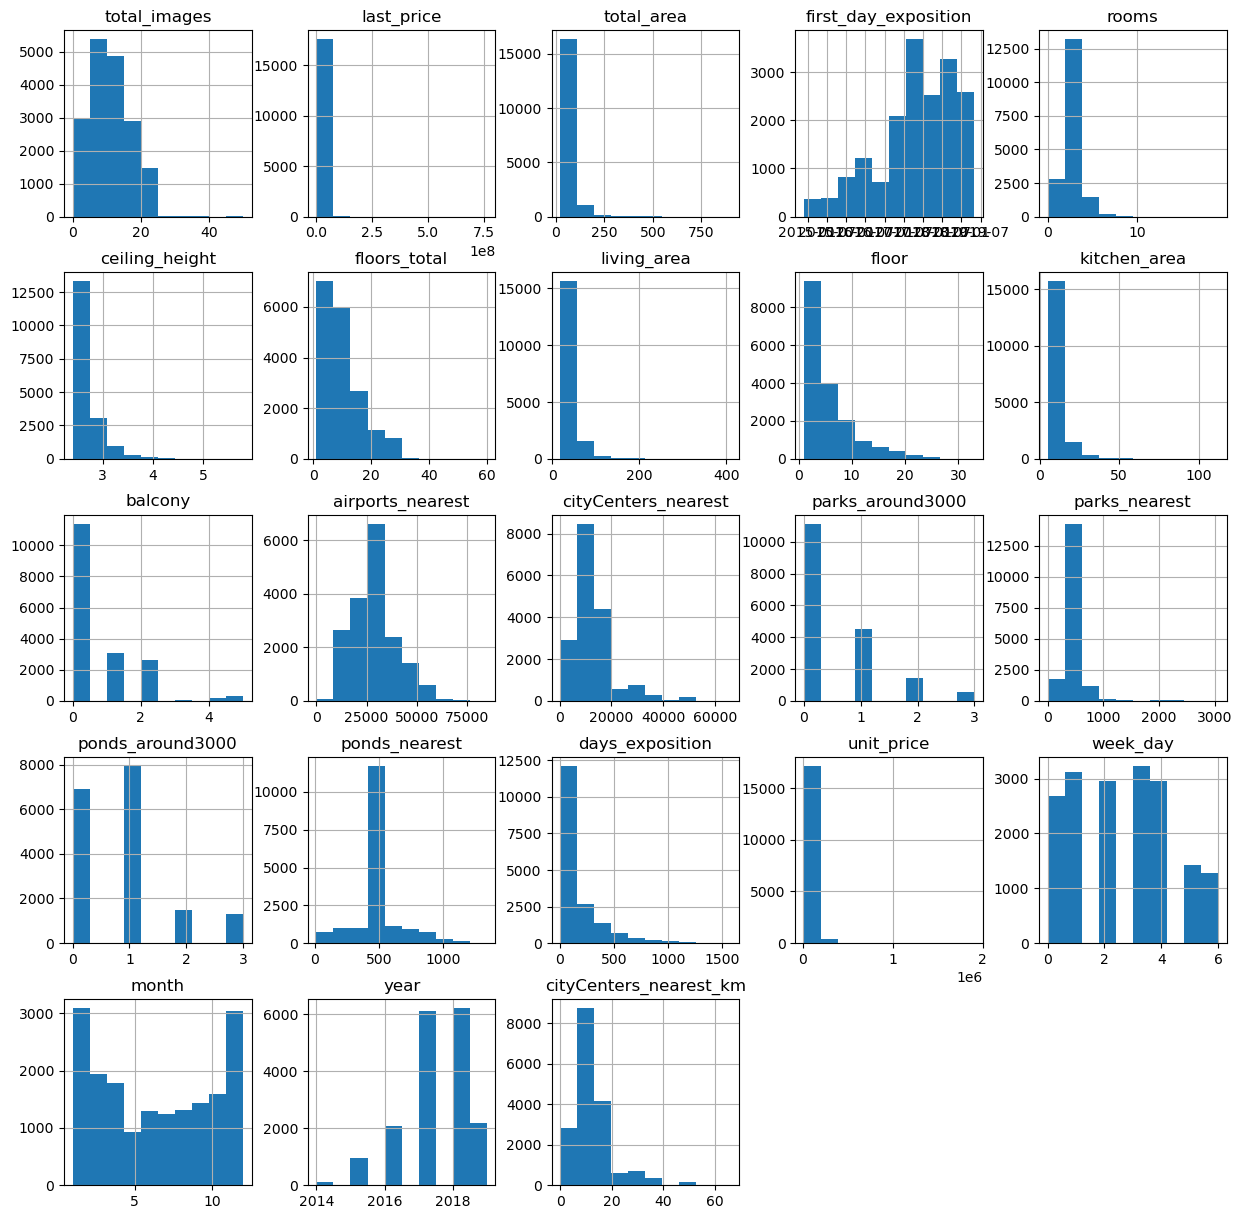

In [70]:
#строю гистограммы для столбцов датафрейма

data.hist(figsize=(15,15))
None

**Некоторые гистограммы информативны даже в таком сжатом виде, например, количество комнат(чаще всего встречается продажа 1/2/3 комнатного жилья), высота потолков до 3 метров, но если нужно проанализировать более детально, необходимо вывести каждый показатель в отдельную гистограмму.**

<AxesSubplot:>

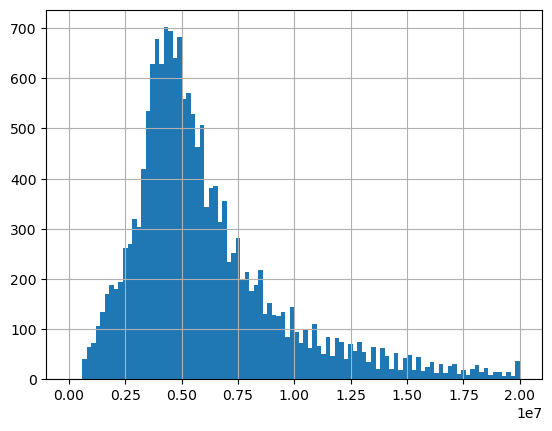

In [71]:
#строю гистограмму для столбца с ценой жилья

data['last_price'].hist(bins=100, range=(0,20000000))

**Очень часто в объявлениях указывают стоимость недвижимости от 3 000 000 до 6 000 000 руб.**

<AxesSubplot:>

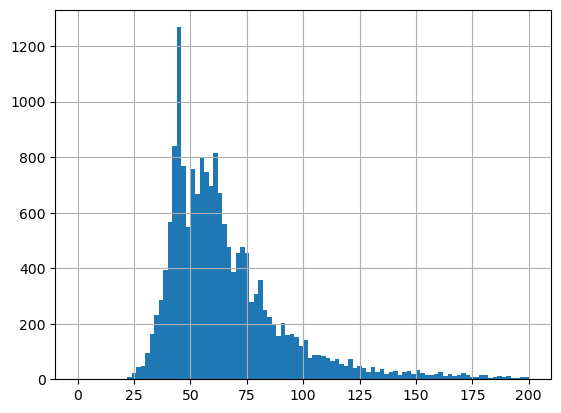

In [72]:
#строю гистограмму для столбца с общей площадью

data['total_area'].hist(bins=100, range=(0,200))

**Площадь недвижимости от 30 до 60 кв.м. встречается в объявлениях на продажу намного чаще, чем с другой общей площадью жилья.**

<AxesSubplot:>

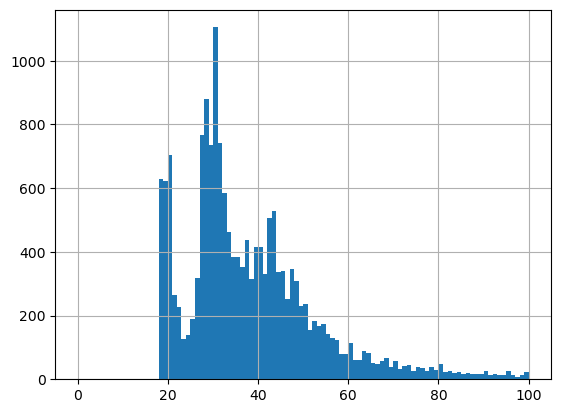

In [73]:
#строю гистограмму для столбца с жилой площадью


data['living_area'].hist(bins=100, range=(0,100))

**Гистограмма распределена неравномерно, есть смысл нарисовать диаграмму размаха.**

(0.0, 100.0)

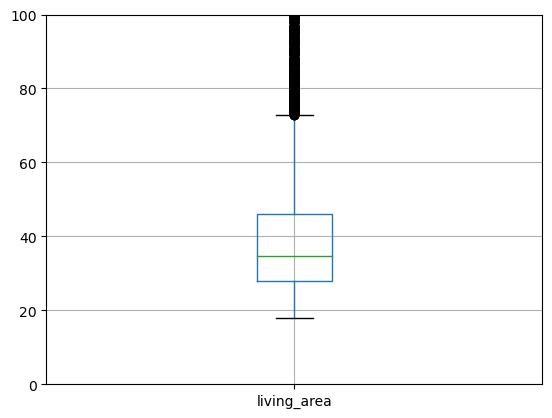

In [74]:
#рисую диаграмму размаха для столбца с жилой площадью, ограничив диапазон по вертикали значениями 0 и 100.

data.boxplot('living_area') 
plt.ylim(0, 100)

**Большая часть значений лежит в диапазоне от 30 до 45 кв.м., что выглядит правдоподобно.**

In [75]:
#проверяю характеристики столбца, дающие представление о его значениях

data['living_area'].describe()

count    17654.000000
mean        40.053126
std         22.332394
min         18.020000
25%         28.000000
50%         34.665000
75%         45.900000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

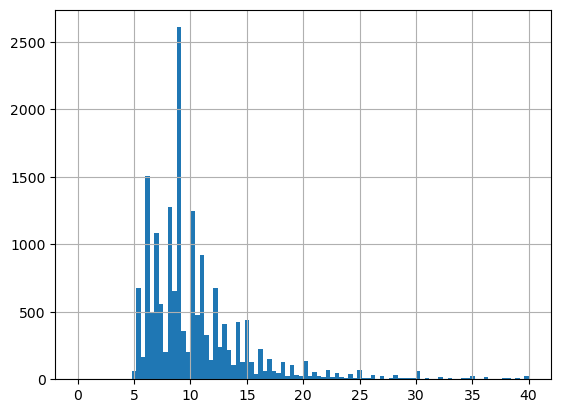

In [76]:
#строю гистограмму для столбца с площадью кухни


data['kitchen_area'].hist(bins=100, range=(0,40))

**Часто площадь кухни недвижимости на продажу в диапазоне от 5 до 12 кв.м.**

<AxesSubplot:>

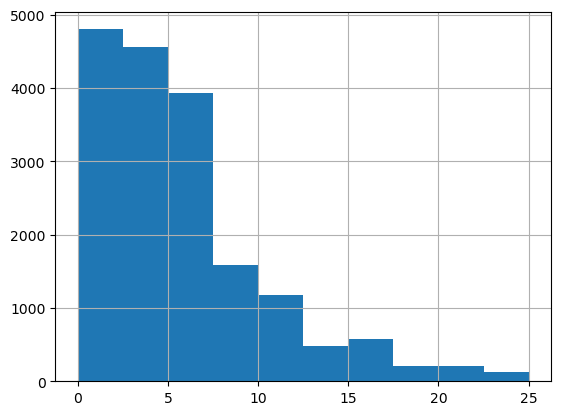

In [77]:
#строю гистограмму для столбца с номером этажа

data['floor'].hist(range=(0,25))

**В среднем, чаще продается недвижимость с 1 по 10 этаж.**

<AxesSubplot:>

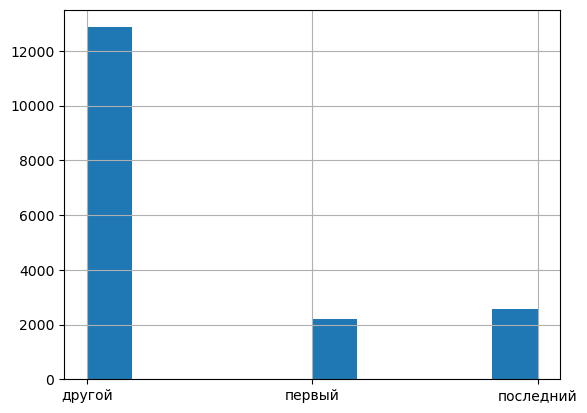

In [78]:
#строю гистограмму для столбца с категорией этажа

data['floor_category'].hist()

**Чаще всего продаются квартиры не с первым и последним этажем, а вот первый и последний этаж выставляют на продажу примерно одинаковое кол-во раз.**

<AxesSubplot:>

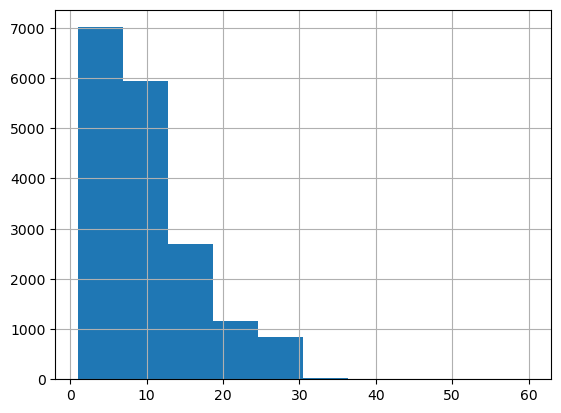

In [79]:
#строю гистограмму для столбца с общим кол-вом этажей в доме

data['floors_total'].hist()

**Чаще всего продаются квартиры в 5 и 9 этажных зданиях, и это логично,т.к. таких домов больше, чем более высоких новостроек.**

<AxesSubplot:>

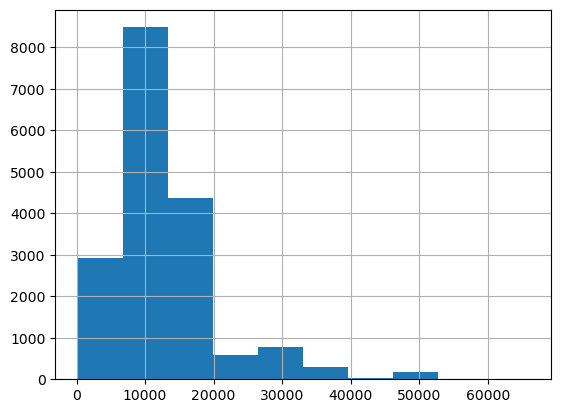

In [80]:
#строю гистограмму для столбца с расстоянием до центра города в метрах

data['cityCenters_nearest'].hist()

**Очень много жилья продается вблизи центра города - от 0 до 20 км., это скорее всего жилье в Санкт-Петербурге и его пригороде.**

<AxesSubplot:>

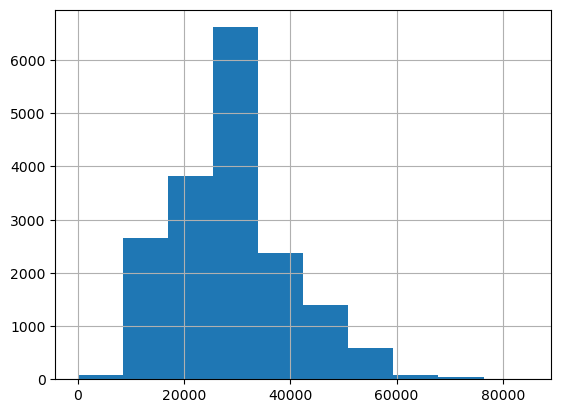

In [81]:
#строю гистограмму для столбца с расстоянием до ближайшего аэропорта

data['airports_nearest'].hist()

**Расстояние до аэропорта от 20 до 30 км - примерно такое расстояние от жилья в Питере до аэропорта Пулково.**

<AxesSubplot:>

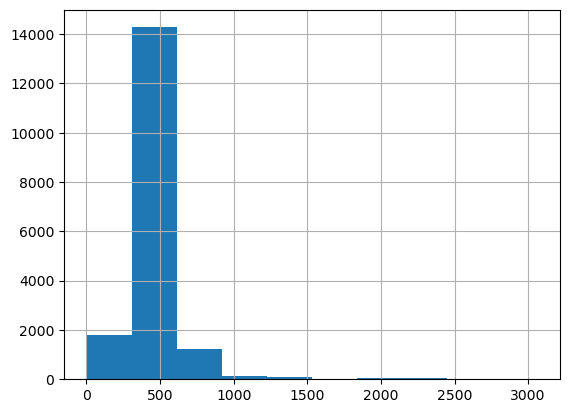

In [82]:
#строю гистограмму для столбца с расстоянием до ближайшего парка

data['parks_nearest'].hist()

**Парки в городах встречаются намного чаще аэропорта и центра, поэтому и расстояние до них около 500 метров.**

<AxesSubplot:xlabel='week_day', ylabel='month'>

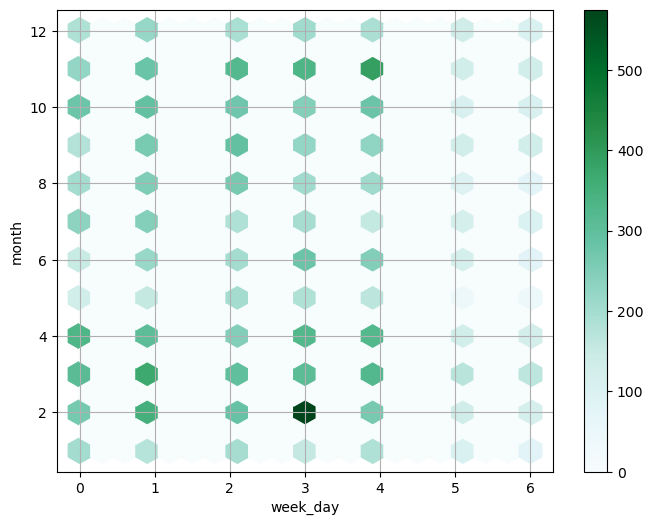

In [83]:
#строю гистограмму для дня недели и месяца публикации объявления

data.plot(x='week_day', y='month', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

**В выходные дни объявления о продаже жилья размещают реже, чем в будние дни. С февраля по апрель и с октября по ноябрь объявления о продаже выставляют чаще, чем в другие месяца. Меньше всего - с мая и до половины лета, возможно, это связано с тем, что летом люди в отпуске и на отдыхе, либо на даче.**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

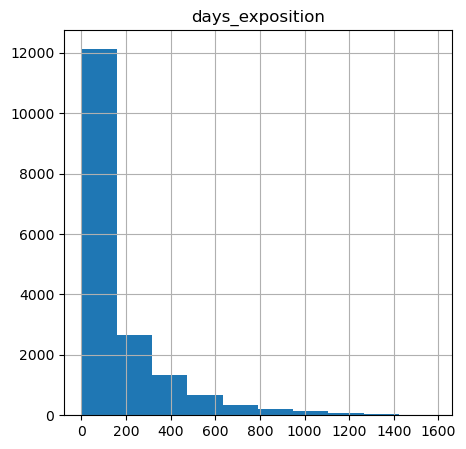

In [84]:
#строю гистограмму для столбца с кол-вом дней размещения объявлений

data.hist('days_exposition', figsize=(5,5))

In [85]:
#проверяю характеристики столбца, дающие представление о его значениях

data['days_exposition'].describe()

count    17654.000000
mean       174.564801
std        211.647692
min          1.000000
25%         52.000000
50%         95.000000
75%        203.750000
max       1580.000000
Name: days_exposition, dtype: float64

**Чаще всего продажа занимает до 100 дней. Быстрыми продажами можно считать продажи в течении месяца, а необычно долгими - до 1580 дней. Количество дней 1580 сильно портит статистику, т.к. медиана составляет 95 дней, а среднее значение 174.**

In [86]:
#создаю сводную таблицу:группировка по названию населенного пункта, значения по цене,общей и жилой площади, площади кухни
# применяю функцию среднего значения

area_corr = data.pivot_table(index='locality_name', values=['last_price','total_area', 'living_area', 'kitchen_area'], \
aggfunc='mean')

In [87]:
#вычисляю корреляцию для сводной таблицы

area_corr.corr()

,kitchen_area,last_price,living_area,total_area
kitchen_area,1.000000,0.521154,0.231810,0.448455
last_price,0.521154,1.000000,0.644107,0.692887
living_area,0.231810,0.644107,1.000000,0.945885
total_area,0.448455,0.692887,0.945885,1.000000


In [88]:
#считаю среднее значения для кол-ва дней публикации объявления

data['days_exposition'].mean()

174.56480117820325

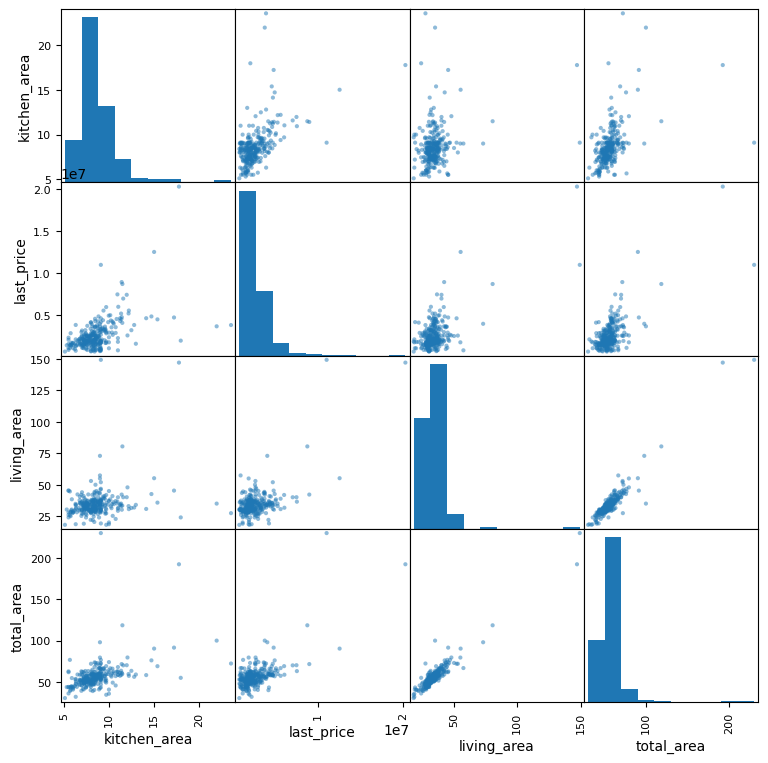

In [89]:
#визуализирую корреляцию с помощью матрицы диаграмм рассеивания

pd.plotting.scatter_matrix(area_corr, figsize=(9,9))
None

**Можно сделать вывод, что цена за жилье в основном не зависит от жилой площади, и уж тем более не зависит от площади кухни. Можно сказать, что при увеличении общей площади увеличивается цена, но это утверждение также далеко от совершенства, корреляция этих величин всего 0.6 и на матрице диаграммы рассеивания этой связи нет.**

<AxesSubplot:xlabel='year'>

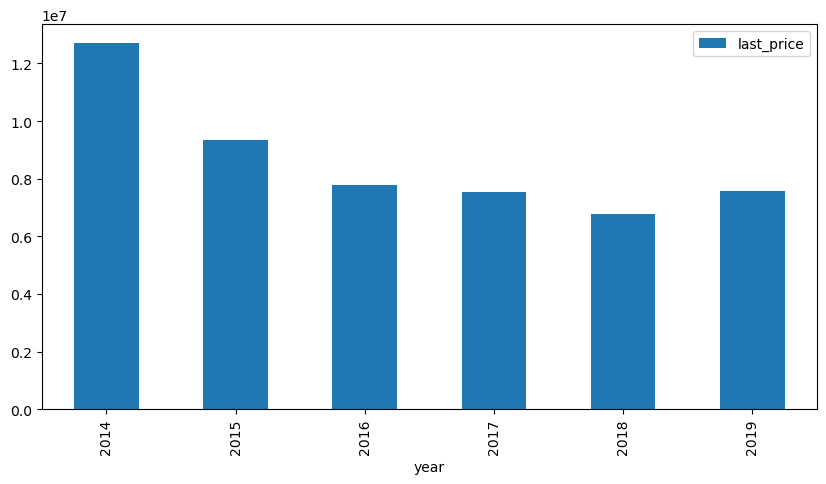

In [90]:
#создаю сводную таблицу:группировка по году, значения по цене, функция среднего значения
#на основании сводной таблицы строю столбчатую диаграмму

data.pivot_table(index= 'year', values='last_price', aggfunc = 'mean').plot(y='last_price', kind='bar', figsize=(10,5))

**Судя по диаграмме, цены на жилье после 2014 года снизились и до 2019 держатся примерно на одном уровне.**

<AxesSubplot:xlabel='month'>

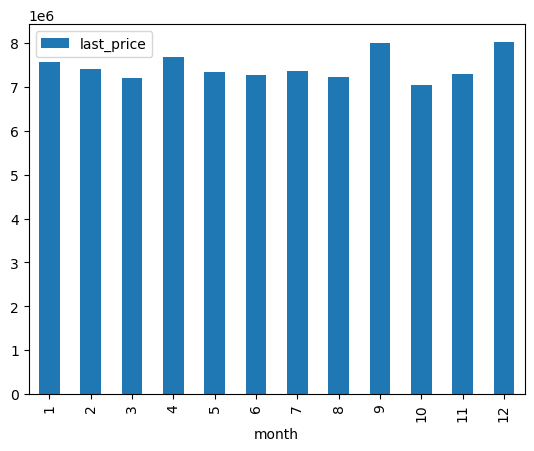

In [91]:
#создаю сводную таблицу:группировка по месяцу, значения по цене, функция среднего значения
#на основании сводной таблицы строю столбчатую диаграмму

data.pivot_table(index= 'month', values='last_price', aggfunc = 'mean').plot(y='last_price', kind='bar')

**Месяц размещения объявления особо не влияет на стоимость жилья, можно сказать, что цены чуть выше в апреле и декабре.**

<AxesSubplot:xlabel='week_day'>

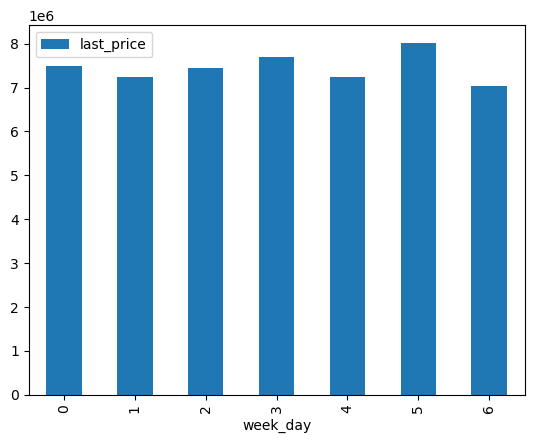

In [92]:
#создаю сводную таблицу:группировка по дню недели, значения по цене, функция среднего значения
#на основании сводной таблицы строю столбчатую диаграмму

data.pivot_table(index= 'week_day', values='last_price', aggfunc = 'mean').plot(y='last_price', kind='bar')

**День недели, в который размещено обьявления, также не имеет существенного влияния на цену, только с пятницы по воскресенье есть небольшое падение.**

<AxesSubplot:xlabel='floor_category'>

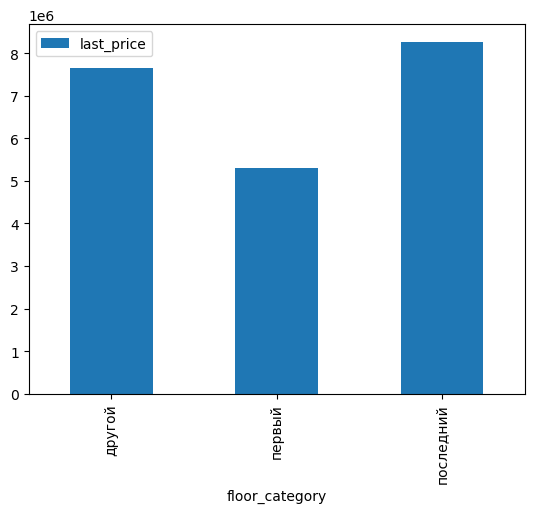

In [93]:
#создаю сводную таблицу:группировка по категории этажа, значения по цене, функция среднего значения
#на основании сводной таблицы строю столбчатую диаграмму

data.pivot_table(index= 'floor_category', values='last_price', aggfunc = 'mean').plot(y='last_price', kind='bar')

**Жилье на 1 этаже стоит дешевле, а вот последний и другие этажи в цене примерно одинаковы.**

### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [94]:
#создаю сводную таблицу, группировка по названию населенного пункта, значения по цене одного кв.м.
# применяю функцию кол-ва и суммы

average_unit_price = data.pivot_table(index='locality_name', values='unit_price', aggfunc = ['count', 'sum'])

In [95]:
#меняю названия столбцов

average_unit_price.columns = ['count', 'sum']

In [96]:
#добавляю столбец со средним значением(сумма / количество)

average_unit_price['mean'] = average_unit_price['sum'] / average_unit_price['count']

In [97]:
#сортирую таблицу по столбцу кол-ва и вывожу первые 10 строк

average_unit_price.sort_values(by='count', ascending=False).head(10)

,count,sum,mean
locality_name,,,
Санкт-Петербург,12349,1.416602e+09,114713.870257
Шушары,302,2.254985e+07,74668.367025
Всеволожск,297,1.975054e+07,66500.146496
Пушкин,268,2.796848e+07,104359.999745
Колпино,258,1.881217e+07,72915.390716
Мурино,219,1.740200e+07,79461.207159
Гатчина,215,1.463114e+07,68051.811627
Выборг,174,9.990798e+06,57418.380511
Парголово,165,1.373898e+07,83266.553349


In [98]:
#оставляю в таблице только строки со значением count >= 129

average_unit_price = average_unit_price[average_unit_price['count'] >= 155]

<AxesSubplot:xlabel='locality_name'>

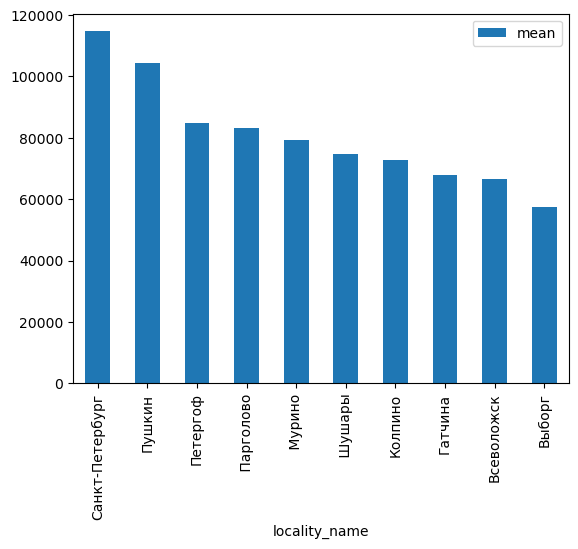

In [99]:
#сортирую таблицу по средней стоимости кв.м. и строю столбчатую диаграмму

average_unit_price.sort_values(by='mean', ascending=False).plot(y='mean', kind='bar')

**10 населённых пунктов с наибольшим числом объявлений : Санкт-Петербург, Пушкин, Петергоф, Парголово, Мурино, Шушары,  Колпино, Гатчина, Всеволжск и Выборг. Самая высокая стоимость квадратного метра в Санкт-Петербурге, Пушкине, Петергофе, а самая низкая - в Выборге.**

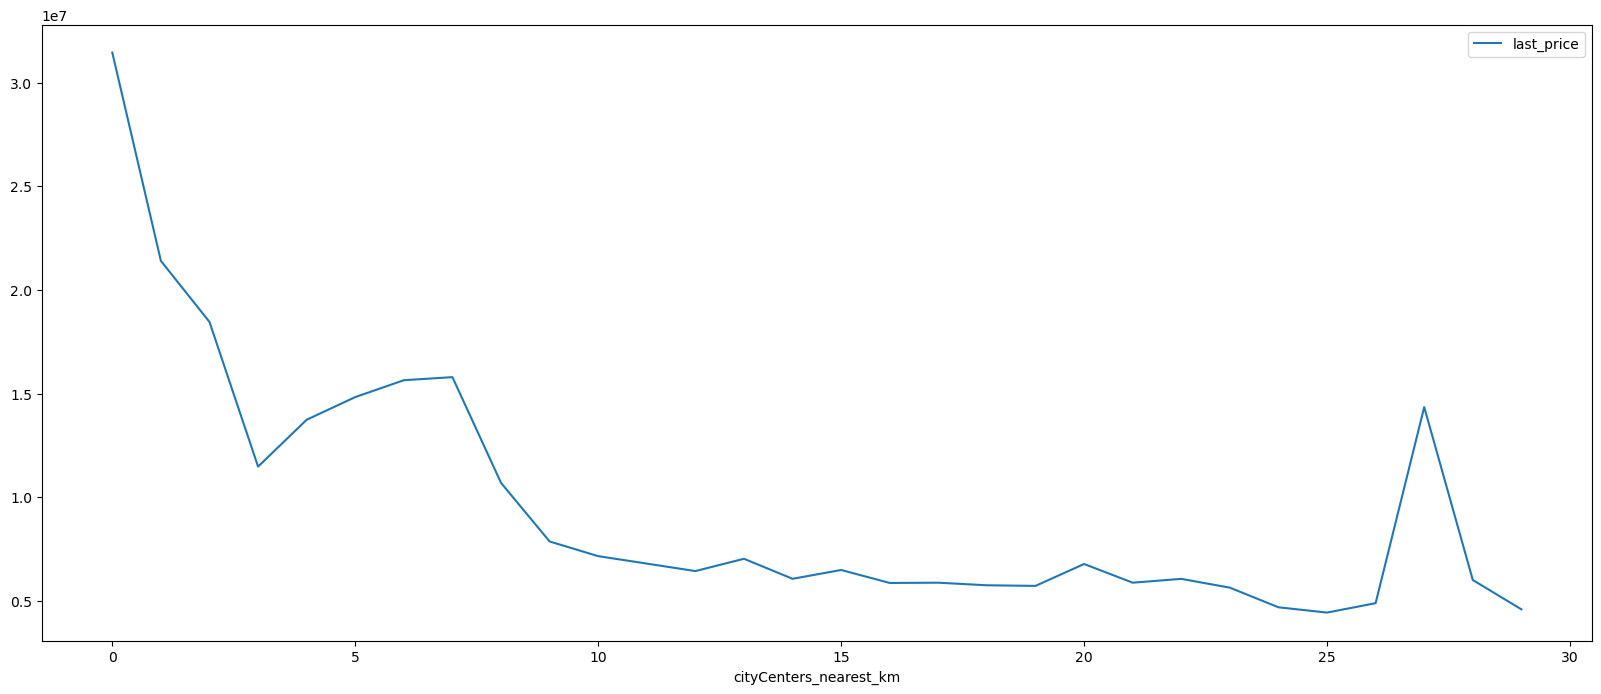

In [100]:
#строю график по сводной таблице по данным из Санкт-Петербурга:группировка по расстоянию до центра км.
#значения цены, функция среднего значения

spb_pivot = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', \
values='last_price', aggfunc = 'mean').plot(figsize=(20,8))

**На графике видно, что при расстоянии жилья до центра от 10 до 30 км. разницы в стоимости нет.
Чем ближе недвижимость к центру, тем она дороже, причем намного, т.к. значения увеличиваются от 10 до 30 миллионов.**

### Общий вывод.

Было проведено исследование, чтобы выполнить предобработку данных и изучить их, найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
Входные данные от сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Объявления содержат два типа данных: добавленные пользователем и картографические.

**В процессе выполнения проекта была выполнена следующая предобработка данных:**
* **преобразован тип данных для даты публикации объявления в datetime64;**
* **обнаружены пропуски:**
    * пропуск в ceiling_height, floors_total, locality_name и kitchen_area может быть связан с тем, что продавец недвижимости не знает этой информации, или не считает эти данные важными, или просто не внёс её в объявление.
    * is_apartment не указывают, т.к. не знают что подразумевает "апартаменты"; 
    * пропуск в картографических данных из-за того, что недвижимость находится далеко от центра/аэропорта/парка.
    * days_exposition со значением NAN связано с тем, что объявление еще не сняли с публикации.
    * пропуски в столбце balcony скорее всего означают, что балкона нет.
* **была проведена обработка пропусков:**
    * пропуски в значениях balcony заменены на 0;
    * удалены строки с пропусками в locality_name и floors_total, т.к. их менее 1% от общего количества;
    * пропуски в living_area заменены на его медианное значение в зависимости от жилой площади;
    * пропуски в kitchen_area, ceiling_height и картографических данных заменены медианным значением;
* **устранены неявные дубликаты в locality_name:**
    * буква ё заменена буквой е;
    * удалены фразы "поселок, поселок городского типа, коттеджный поселок, деревня, село" и пр.
* **устранены редкие и выбивающиеся значения:**
    * недвижимость менее 10 кв.м. жилой и менее 18 общей площади;
    * недвижимость с площадью кухни менее 5 кв.м.;
    * недвижимость с высотой потолков менее 2,4 и выше 6 метров.
* **добавлены новые столбцы:**
    * цена одного квадратного метра;
    * день недели, месяц и год публикации объявления;
    * тип этажа квартиры (значения — первый, последний, другой);
    * расстояние до центра города в километрах.
    
* **В процессе выполнения проекта был произведен исследовательский анализ данных:**
    * изучены параметры всех объектов, построены гистограммы;
    * изучено, как быстро продавались квартиры;
    * изучено, зависит ли цена от каких-то факторов;
    * посчитана средняя цена одного кв. метра в 10 населённых пунктах с наибольшим числом объявлений;
    * выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра;
    * выделены квартиры в Санкт-Петербурге и их средняя цена каждого километра до центра города.


**В результате удалось определить наиболее популярные данные в объявлениях :**
* стоимость недвижимости составляет от 3 000 000 до 6 000 000 руб.;
* общая площадь недвижимости от 30 до 60 кв.м.;
* жилая площадь недвижимости от 30 до 45 кв.м.;
* площадь кухни от 6 до 12 кв.м.;
* продажа жилья в 5 и 9 этажных зданиях, и это логично, т.к. таких домов больше, чем более высоких новостроек;
* много недвижимости продается вблизи центра города - от 0 до 20 км., это скорее всего жилье в Санкт-Петербурге и вблизи него;
* расстояние до аэропорта от 20 до 30 км - примерно такое расстояние от жилья в Питере до аэропорта Пулково;
* расстояние до парков около 500 метров - всё потому, что парки в населенных пунктах встречаются намного чаще аэропорта и центра;
* в выходные дни объявления о продаже жилья размещают реже, чем в будние дни;
* весной и осенью объявления о продаже выставляют чаще, а реже всего-летом, скорее всего, это связано с тем, что летом люди в отпуске и на отдыхе, либо на даче;
* чаще всего продажа занимает до 100 дней;

**В результате анализа данных также были исследованы некоторые зависимости:**
* Цена за жилье в основном не зависит от жилой площади, и уж тем более не зависит от площади кухни. Можно сказать, что при увеличении общей площади увеличивается цена, но это утверждение также далеко от совершенства, корреляция этих величин всего 0.6. 
Скорее всего, на стоимость жилья влияют разные значения, в том числе такие, которые не указаны во входных данных, например, ремонт и состояние недвижимости.
* Судя по диаграмме, цены на жилье после 2014 года снизились и до 2019 держатся примерно на одном уровне.
* День недели, а также месяц размещения объявления существенно не влияют на стоимость недвижимости.
* 10 населённых пунктов с наибольшим числом объявлений : Санкт-Петербург, Пушкин, Петергоф, Парголово, Мурино, Шушары,  Колпино, Гатчина, Всеволжск и Выборг. Самая высокая стоимость квадратного метра в Санкт-Петербурге, Пушкине, Петергофе, а самая низкая - в Выборге. Самая высокая стоимость квадратного метра в Санкт-Петербурге, Пушкине, Петергофе (от 84 до  114 тыс.руб.), а самая низкая - в Выборге, 58 тыс.руб.
* В Санкт-Петербурге при расстоянии жилья до центра от 10 до 30 км. разницы в стоимости нет. Чем ближе недвижимость к центру, тем она дороже, причем намного, т.к. значения увеличиваются от 10 до 30 миллионов.

